# Polynomial Regression

## Limitations of linear regression

Linear regression requires the relation between the dependent variable and the independent variable to be linear. What if the distribution of the data was more complex as shown in the below figure? Can linear models be used to fit non-linear data? 

<img src="https://miro.medium.com/max/1280/1*ELey2wytlZvKYFLbLbhCoA.png">

How can we generate a curve that best captures this kind of data?

To understand the need for polynomial regression, let’s generate some random dataset first.

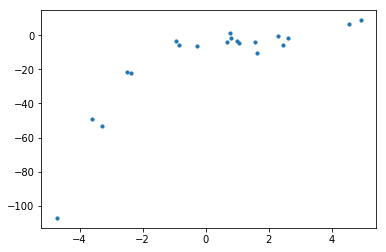

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
x = 2 - 3 * np.random.normal(0, 1, 20)
y = x - 2 * (x ** 2) + 0.5 * (x ** 3) + np.random.normal(-3, 3, 20)
plt.scatter(x,y, s=10)
plt.show()

Now you should apply a linear model to this data, use the ```LinearRegression``` method from ```sklearn``` and plot the result. Remember that in order to use the ```.fit()``` method you need to add a new axis to x and y

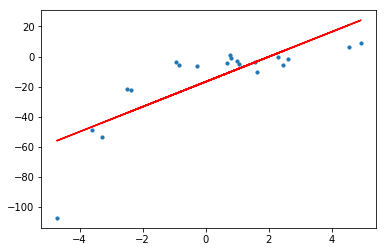

In [2]:
from sklearn.linear_model import LinearRegression

np.random.seed(0)
x = 2 - 3 * np.random.normal(0, 1, 20)
y = x - 2 * (x ** 2) + 0.5 * (x ** 3) + np.random.normal(-3, 3, 20)

# transforming the data to include another axis
x = x[:, np.newaxis]
y = y[:, np.newaxis]

model = LinearRegression()
model.fit(x, y)
y_pred_linear = model.predict(x)

plt.scatter(x, y, s=10)
plt.plot(x, y_pred_linear, color='r')
plt.show()

Does the linear model really capture the variability of the data? This is called *under-fitting*. This term is used when the model used to fit the data is too simple to really capture all the complexity of the data. To have a more quantitative measure of this under-fitting, compute the $R²$ and Root Mean Squared Error of the fit.

In [3]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse

r2 = r2_score(y, y_pred_linear)
rmse = np.sqrt(mse(y, y_pred_linear)) 
print(f'R2 for this prediction: {round(r2,2)}')
print(f'RMSE for this prediction: {round(rmse,2)}')

R2 for this prediction: 0.64
RMSE for this prediction: 15.91


A pretty straight-forward way to add complexity to this model, is to add powers of the original features as new features. In this manner, the lineal model:

$$y=\theta_0+ \theta_1x$$ 

derives to,

$$y=\theta_0+ \theta_1x + \theta_2x²$$ 

Now the beauty of this trick, is that you are still training a linear model. Which means you can still use the same algorithms to train it, but the curve that this will generate is actually quadratic.

To convert the original features into their higher order terms we will use the ```PolynomialFeatures``` class provided by ```scikit-learn```. And then we will use the same method to fit the curve and print the $R²$ and RMSE values, how do they compare to the previous case?. Do not plot the results just yet!

In [4]:
from sklearn.preprocessing import PolynomialFeatures
import operator

np.random.seed(0)
x = 2 - 3 * np.random.normal(0, 1, 20)
y = x - 2 * (x ** 2) + 0.5 * (x ** 3) + np.random.normal(-3, 3, 20)

# transforming the data to include another axis
x = x[:, np.newaxis]
y = y[:, np.newaxis]

polynomial_features= PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(x)

model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred_2 = model.predict(x_poly)

rmse = np.sqrt(mse(y,y_poly_pred_2))
r2 = r2_score(y,y_poly_pred_2)
print(f'RMSE for this prediction: {rmse}')
print(f'R2 for this prediction: {r2}')

RMSE for this prediction: 10.120437473614711
R2 for this prediction: 0.8537647164420812


In [5]:
print(-3.29215704*-3.29215704) 
x_poly[0:10,]
####### Notice in the third column we have the term x^2

10.838297976021563


array([[ 1.        , -3.29215704, 10.83829796],
       [ 1.        ,  0.79952837,  0.63924562],
       [ 1.        , -0.93621395,  0.87649656],
       [ 1.        , -4.7226796 , 22.30370258],
       [ 1.        , -3.60267397, 12.97925974],
       [ 1.        ,  4.93183364, 24.32298305],
       [ 1.        , -0.85026525,  0.722951  ],
       [ 1.        ,  2.45407162,  6.02246754],
       [ 1.        ,  2.30965656,  5.3345134 ],
       [ 1.        ,  0.76820449,  0.59013814]])

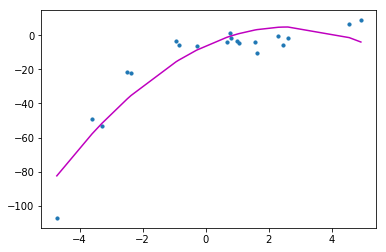

In [6]:
plt.scatter(x, y, s=10)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred_2), key=sort_axis)
x, y_poly_pred_2 = zip(*sorted_zip)
plt.plot(x, y_poly_pred_2, color='m')
plt.show()

Now try to see what happens if the we fit a polynomial of degree 3. What are the $R²$, and the RMSE? 

In [7]:
from sklearn.preprocessing import PolynomialFeatures
import operator

np.random.seed(0)
x = 2 - 3 * np.random.normal(0, 1, 20)
y = x - 2 * (x ** 2) + 0.5 * (x ** 3) + np.random.normal(-3, 3, 20)

# transforming the data to include another axis
x = x[:, np.newaxis]
y = y[:, np.newaxis]

polynomial_features= PolynomialFeatures(degree=3)
x_poly = polynomial_features.fit_transform(x)

model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred_3 = model.predict(x_poly)

rmse = np.sqrt(mse(y,y_poly_pred_3))
r2 = r2_score(y,y_poly_pred_3)
print(f'RMSE for this prediction: {rmse}')
print(f'R2 for this prediction: {r2}')

RMSE for this prediction: 3.449895507408724
R2 for this prediction: 0.9830071790386679


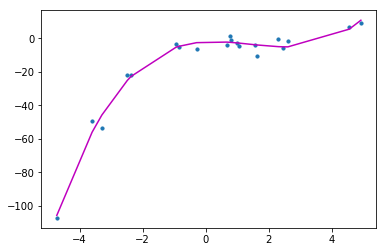

In [8]:
plt.scatter(x, y, s=10)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred_3), key=sort_axis)
x, y_poly_pred_3 = zip(*sorted_zip)
plt.plot(x, y_poly_pred_3, color='m')
plt.show()

Now fit a model of degree 20, how do RMSE and $R²$ behave. Create a plot with the three fits overlaped. Do you think this is the model that better explains the data? Why?

In [9]:
from sklearn.preprocessing import PolynomialFeatures
import operator

np.random.seed(0)
x = 2 - 3 * np.random.normal(0, 1, 20)
y = x - 2 * (x ** 2) + 0.5 * (x ** 3) + np.random.normal(-3, 3, 20)

# transforming the data to include another axis
x = x[:, np.newaxis]
y = y[:, np.newaxis]

polynomial_features= PolynomialFeatures(degree=20)
x_poly = polynomial_features.fit_transform(x)

model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred_20 = model.predict(x_poly)

rmse = np.sqrt(mse(y,y_poly_pred_20))
r2 = r2_score(y,y_poly_pred_20)
print(f'RMSE for this prediction: {rmse}')
print(f'R2 for this prediction: {r2}')

RMSE for this prediction: 1.1131620902350652
R2 for this prediction: 0.9982308265442509


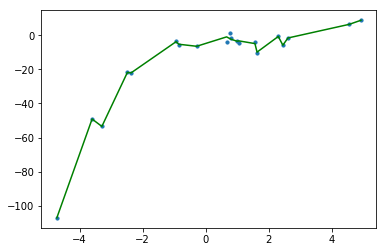

In [10]:
## Degree 20 
plt.scatter(x, y, s=10)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred_20), key=sort_axis)
x, y_poly_pred_20 = zip(*sorted_zip)
plt.plot(x, y_poly_pred_20, color='g')
plt.show()

For degree=20, the model is also capturing the noise in the data. This is an example of *over-fitting*. Even though this model passes through most of the data, it will fail to generalize on unseen data.

To prevent *over-fitting*, we can add more training samples so that the algorithm doesn’t learn the noise in the system and can become more generalized.
How do we choose an optimal model? To answer this question we need to understand the bias vs variance trade-off.

## Variance vs Bias trade-off

*Bias* refers to the error due to the model’s simplistic assumptions in fitting the data. A high bias means that the model is unable to capture the patterns in the data and this results in under-fitting.

*Variance* refers to the error due to the complex model trying to fit the data. High variance means the model passes through most of the data points and it results in over-fitting the data.

The below picture summarizes our learning.

<img src="https://miro.medium.com/max/1946/1*zOl_ztYqnzyWRkBffeOsRQ.png">

From the below picture we can observe that as the model complexity increases, the bias decreases and the variance increases and vice-versa. Ideally, a machine learning model should have low variance and low bias. But practically it’s impossible to have both. Therefore to achieve a good model that performs well both on the train and unseen data, a trade-off is made. Source: http://scott.fortmann-roe.com/docs/BiasVariance.html

<img src="http://scott.fortmann-roe.com/docs/docs/BiasVariance/biasvariance.png">

Think about the behaviour of our metrics to evaluate the performance of the algorithm. Which ways could we use to control if our model is actually performing better?

## The Boston Housing Dataset

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [12]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [13]:
# Load the diabetes dataset
boston_ds = datasets.load_boston()

In [14]:
print(boston_ds.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [15]:
boston = pd.DataFrame(boston_ds.data, columns=boston_ds.feature_names)
boston['MEDV'] = boston_ds.target
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### Simple Linear Regression Model

Load the Boston Housing Dataset, and prepare train and test splits X_train, Y_train, X_test, Y_test

In [16]:
X = boston[['RM']]
Y = boston['MEDV']

Split the data into training and testing sets. We train the model with 80% of the samples and test with the remaining 20%. We do this to assess the model’s performance on unseen data. To split the data you may use scikit-learn library. Set random_state=5

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 1)
(102, 1)
(404,)
(102,)


In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [19]:
from sklearn import metrics

y_train_predict = lin_model.predict(X_train)

print("The model performance for the training set")
print("-------------------------------------------")
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_train, y_train_predict)))
print('R2 Score:', metrics.r2_score(Y_train, y_train_predict))

print("\n")

y_test_predict = lin_model.predict(X_test)
print("The model performance for the test set")
print("-------------------------------------------")
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, y_test_predict)))
print('R2 Score:', metrics.r2_score(Y_test, y_test_predict))




The model performance for the training set
-------------------------------------------
RMSE: 6.972277149440585
R2 Score: 0.4340897790637215


The model performance for the test set
-------------------------------------------
RMSE: 4.895963186952216
R2 Score: 0.6938399401553497


### Polynomial Regression Model

In [20]:
from sklearn.preprocessing import PolynomialFeatures

def create_polynomial_regression_model(degree, verbose = True, text_out=True):
    
    "Creates a polynomial regression model for the given degree"

    poly_features = PolynomialFeatures(degree=degree)

    # transforms the existing features to higher degree features.
    X_train_poly = poly_features.fit_transform(X_train)

    # fit the transformed features to Linear Regression
    poly_model = LinearRegression()
    poly_model.fit(X_train_poly, Y_train)        

    y_poly_pred = poly_model.predict(X_train_poly)

    # predicting on training data-set
    y_train_predicted = poly_model.predict(X_train_poly)


    ##########################################
    ##########################################
    if X_train.shape[1] == 1:
        import operator
        plt.scatter(X_train, Y_train, s=10)
        x = np.array(X_train.iloc[:,0])
        x = x[:, np.newaxis]
        y = Y_train[:, np.newaxis]

        plt.scatter(x, y, s=10)
        # sort the values of x before line plot
        sort_axis = operator.itemgetter(0)
        sorted_zip = sorted(zip(x,y_train_predicted), key=sort_axis)
        x, y_train_predicted = zip(*sorted_zip)
        plt.plot(x, y_train_predicted, color='b')
        plt.title("RM vs MEDV (Training set)")
        plt.xlabel("RM")
        plt.ylabel("MEDV")
        plt.show()
        plt.show()
    ##########################################
    ##########################################
    # predicting on test data-set
    y_test_predict = poly_model.predict(poly_features.fit_transform(X_test))

    # evaluating the model on training dataset
    rmse_train = np.sqrt(mean_squared_error(Y_train, y_train_predicted))
    r2_train = r2_score(Y_train, y_train_predicted)

    # evaluating the model on test dataset
    rmse_test = np.sqrt(mean_squared_error(Y_test, y_test_predict))
    r2_test = r2_score(Y_test, y_test_predict)
    
    
    if text_out:
        print("The model performance for the training set")
        print("-------------------------------------------")
        print("RMSE of training set is {}".format(rmse_train))
        print("R2 score of training set is {}".format(r2_train))

        print("\n")

        print("The model performance for the test set")
        print("-------------------------------------------")
        print("RMSE of test set is {}".format(rmse_test))
        print("R2 score of test set is {}".format(r2_test))
    return (rmse_train, rmse_test)

#### Try with multiple degrees and observe how the fitting line change

Remember:
R-squared is the percentage of the dependent variable variation that a linear model explains.

$${\displaystyle R^2 = \frac {\text{Variance explained by the model}}{\text{Total variance}}}$$



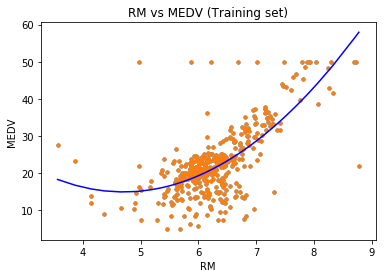

(11.40261641392256, 4.612018956269432)

In [21]:
create_polynomial_regression_model(2, text_out=False)

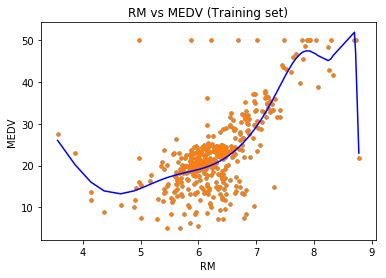

(11.641919001599437, 4.88564894634459)

In [22]:
create_polynomial_regression_model(20, text_out=False)

## Multivariate models

In [23]:
X = boston[['LSTAT','RM']]
Y = boston['MEDV']

# Split training and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)



(404, 2)
(102, 2)
(404,)
(102,)


### Linear Regression

In [24]:
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

y_train_predict = lin_model.predict(X_train)

print("The model performance for the training set")
print("-------------------------------------------")
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_train, y_train_predict)))
print('R2 Score:', metrics.r2_score(Y_train, y_train_predict))

print("\n")

y_test_predict = lin_model.predict(X_test)
print("The model performance for the test set")
print("-------------------------------------------")
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, y_test_predict)))
print('R2 Score:', metrics.r2_score(Y_test, y_test_predict))

The model performance for the training set
-------------------------------------------
RMSE: 5.6371293350711955
R2 Score: 0.6300745149331701


The model performance for the test set
-------------------------------------------
RMSE: 5.137400784702911
R2 Score: 0.6628996975186953


### Polynomial Regression

In [25]:
create_polynomial_regression_model(2)

The model performance for the training set
-------------------------------------------
RMSE of training set is 4.703071027847755
R2 score of training set is 0.7425094297364766


The model performance for the test set
-------------------------------------------
RMSE of test set is 3.7848198845450263
R2 score of test set is 0.8170372495892192


(4.703071027847755, 3.7848198845450263)

### Try with multiple degrees and observe the trend of the training and test errors

In [26]:
errors_train_test = []
for d in range(10):
    errors_train_test.append(create_polynomial_regression_model(d, text_out=False))

In [32]:
create_polynomial_regression_model(7)

The model performance for the training set
-------------------------------------------
RMSE of training set is 3.97576844197057
R2 score of training set is 0.8159904268254061


The model performance for the test set
-------------------------------------------
RMSE of test set is 4.64441776867793
R2 score of test set is 0.7244916266500145


(3.97576844197057, 4.64441776867793)

In [27]:
errors_train_test

[(9.268316868041094, 8.86642863576618),
 (5.6371293350711955, 5.13740078470291),
 (4.703071027847755, 3.7848198845450263),
 (4.532072326616816, 3.8691974071822512),
 (4.276081212074226, 3.8885946020800866),
 (4.121480266467183, 3.8561483766521816),
 (8.690558802757026, 14.87984555589975),
 (3.97576844197057, 4.64441776867793),
 (3.9849309048433534, 24.14996469072871),
 (3.930384796677755, 9.553906766391949)]

In [28]:
errors_train = [i[0] for i in errors_train_test]
errors_test = [i[1] for i in errors_train_test]
x = range(len(errors_train_test))

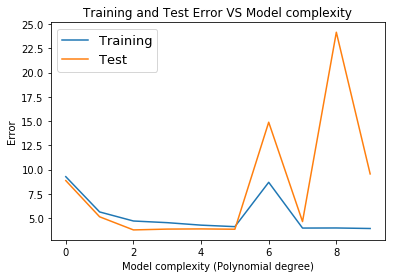

In [29]:

plt.plot(x, errors_train, label='Training')
plt.plot(x, errors_test, label='Test')
plt.legend(fontsize=13,loc='best')
plt.title("Training and Test Error VS Model complexity")
plt.xlabel("Model complexity (Polynomial degree)")
plt.ylabel("Error")
plt.show()